In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import time

t0 = time.time()

In [4]:
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
import json
import scipy.stats as stats
from matplotlib.patches import Ellipse

from aml_dl.mdn.model.mdn_push_fwd_model import MDNPushFwdModel
from config.shape_db import *
import tf.transformations as tfm
shape_db = ShapeDB()

#from aml_data_collec_utils.core.data_manager import DataManager
#from aml_dl.mdn.utilities.get_data_from_files import get_data_from_files

In [5]:
sess = tf.InteractiveSession()
    
adam_params = {
    'type': 'adam',
    'params': {'learning_rate' : 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08, 'use_locking': False}
}

network_params = {
    'dim_input': 61, 
    'dim_output': 3,
    'n_hidden': 400,
    'k_mixtures': 200,
    'write_summary': False,
    'learning_rate': 0.00005,
    'load_saved_model': False,
    'optimiser': adam_params,
    'device': '/cpu:0',
    'dropout_prob': 0.8,
    'weight_multiplier': 1.0, # changed iteratively later on only if halfweightValidation used (for dropout)
    'weight_reg_coef': 0.001, # change to factor weight size regularization
    'max_weight_mag': 1000, # set high to turn off weight contraining
}

forward_model = MDNPushFwdModel(sess=sess, network_params=network_params)
forward_model.init_model()

In [6]:
# load data
json_filepath = '/home/harry/Honeycomb/surface_compare/delrin/rect1_json/data_training_with_shapeBounds_andForce.json'

with open(json_filepath) as data_file:    
		data_rect1 = json.load(data_file)
        
json_filepath = '/home/harry/Honeycomb/surface_compare/delrin/rect2_json/data_training_with_shapeBounds_andForce.json'
with open(json_filepath) as data_file:    
		data_rect2 = json.load(data_file)
        
json_filepath = '/home/harry/Honeycomb/surface_compare/delrin/rect3_json/data_training_with_shapeBounds_andForce.json'
with open(json_filepath) as data_file:    
		data_rect3 = json.load(data_file)

In [7]:
# steps needed for the shapes dataset, remove once optimized for any data

#----------------------CHANGE FOR DIFFERENT VAL SET---------------------------------        
train_data = []
train_data.extend(data_rect2)
train_data.extend(data_rect3)

val_data = []
val_data.extend(data_rect1)

shape_ids = ['rect1']

dataNew = []
for i in range(len(data_rect1)):
    if (train_data[i][13] == 10):
        dataNew.append(data_rect1[i])
data_rect1 = dataNew
#----------------------------------------------------------------------------------------

# use lens to seperate sets for visualization
len1 = len(data_rect1)
len2 = len(data_rect2)
len3 = len(data_rect3)
# removes all velocity cases
dataNew = []
for i in range(len(train_data)):
    if (train_data[i][13] == 10):
        dataNew.append(train_data[i])
train_data = dataNew

dataNew = []
for i in range(len(val_data)):
    if (val_data[i][13] == 10):
        dataNew.append(val_data[i])
val_data = dataNew

# rescale (min max normalise)
all_data = train_data
all_data.extend(val_data)
all_data = np.array(all_data)
mins = np.amin(all_data, axis = 0)
maxs = np.amax(all_data, axis = 0)

train_data = (train_data-mins)/(maxs-mins)
val_data = (val_data-mins)/(maxs-mins)

Ymins = np.r_[mins[7:10]] # 7,8,9
Ymaxs = np.r_[maxs[7:10]]
Xmins = np.r_[mins[0:7], mins[10:13], mins[14:65]] # 1,2,3,4,5,6,10,11,12,14
Xmaxs = np.r_[maxs[0:7], maxs[10:13], maxs[14:65]]
    
dataX = train_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
dataY = train_data[:, [7,8, 9]] # end parameters
    
dataX_val = val_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
dataY_val = val_data[:, [7,8, 9]] # end parameters

dataX_val1 = dataX_val[0:len1]
dataY_val1 = dataY_val[0:len1]
dataY_val2 = dataY_val[len1:len1+len2]
dataY_val3 = dataY_val[len1+len2:len1+len2+len3]
print np.shape(train_data), '= train_data'

(1188, 65) = train_data


/home/harry/.virtualenvs/robotics/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in divide
/home/harry/.virtualenvs/robotics/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in divide


Starting epoch 	0
Starting epoch 	1
Starting epoch 	2
Starting epoch 	3
Starting epoch 	4
Starting epoch 	5
Starting epoch 	6
Starting epoch 	7
Starting epoch 	8
Starting epoch 	9
Starting epoch 	10
Starting epoch 	11
Starting epoch 	12
Starting epoch 	13
Starting epoch 	14
Starting epoch 	15
Starting epoch 	16
Starting epoch 	17
Starting epoch 	18
Starting epoch 	19
Starting epoch 	20
Starting epoch 	21
Starting epoch 	22
Starting epoch 	23
Starting epoch 	24
Starting epoch 	25
Starting epoch 	26
Starting epoch 	27
Starting epoch 	28
Starting epoch 	29
Starting epoch 	30
Starting epoch 	31
Starting epoch 	32
Starting epoch 	33
Starting epoch 	34
Starting epoch 	35
Starting epoch 	36
Starting epoch 	37
Starting epoch 	38
Starting epoch 	39
Starting epoch 	40
Starting epoch 	41
Starting epoch 	42
Starting epoch 	43
Starting epoch 	44
Starting epoch 	45
Starting epoch 	46
Starting epoch 	47
Starting epoch 	48
Starting epoch 	49
Starting epoch 	50
Starting epoch 	51
Starting epoch 	52
Sta

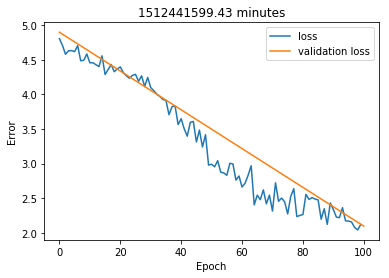

Starting epoch 	101
Starting epoch 	102
Starting epoch 	103
Starting epoch 	104
Starting epoch 	105
Starting epoch 	106
Starting epoch 	107
Starting epoch 	108
Starting epoch 	109
Starting epoch 	110
Starting epoch 	111
Starting epoch 	112
Starting epoch 	113
Starting epoch 	114
Starting epoch 	115
Starting epoch 	116
Starting epoch 	117
Starting epoch 	118
Starting epoch 	119
Starting epoch 	120
Starting epoch 	121
Starting epoch 	122
Starting epoch 	123
Starting epoch 	124
Starting epoch 	125
Starting epoch 	126
Starting epoch 	127
Starting epoch 	128
Starting epoch 	129
Starting epoch 	130
Starting epoch 	131
Starting epoch 	132
Starting epoch 	133
Starting epoch 	134
Starting epoch 	135
Starting epoch 	136
Starting epoch 	137
Starting epoch 	138
Starting epoch 	139
Starting epoch 	140
Starting epoch 	141
Starting epoch 	142
Starting epoch 	143
Starting epoch 	144
Starting epoch 	145
Starting epoch 	146
Starting epoch 	147
Starting epoch 	148
Starting epoch 	149
Starting epoch 	150


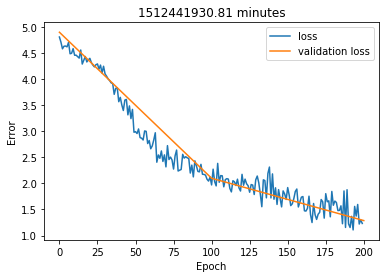

Starting epoch 	201
Starting epoch 	202
Starting epoch 	203
Starting epoch 	204
Starting epoch 	205
Starting epoch 	206
Starting epoch 	207
Starting epoch 	208
Starting epoch 	209
Starting epoch 	210
Starting epoch 	211
Starting epoch 	212
Starting epoch 	213
Starting epoch 	214
Starting epoch 	215
Starting epoch 	216
Starting epoch 	217
Starting epoch 	218
Starting epoch 	219
Starting epoch 	220
Starting epoch 	221
Starting epoch 	222
Starting epoch 	223
Starting epoch 	224
Starting epoch 	225
Starting epoch 	226
Starting epoch 	227
Starting epoch 	228
Starting epoch 	229
Starting epoch 	230
Starting epoch 	231
Starting epoch 	232
Starting epoch 	233
Starting epoch 	234
Starting epoch 	235
Starting epoch 	236
Starting epoch 	237
Starting epoch 	238
Starting epoch 	239
Starting epoch 	240
Starting epoch 	241
Starting epoch 	242
Starting epoch 	243
Starting epoch 	244
Starting epoch 	245
Starting epoch 	246
Starting epoch 	247
Starting epoch 	248
Starting epoch 	249
Starting epoch 	250


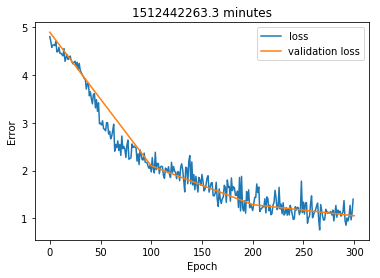

Starting epoch 	301
Starting epoch 	302
Starting epoch 	303
Starting epoch 	304
Starting epoch 	305
Starting epoch 	306
Starting epoch 	307
Starting epoch 	308
Starting epoch 	309
Starting epoch 	310
Starting epoch 	311
Starting epoch 	312
Starting epoch 	313
Starting epoch 	314
Starting epoch 	315
Starting epoch 	316
Starting epoch 	317
Starting epoch 	318
Starting epoch 	319
Starting epoch 	320
Starting epoch 	321
Starting epoch 	322
Starting epoch 	323
Starting epoch 	324
Starting epoch 	325
Starting epoch 	326
Starting epoch 	327
Starting epoch 	328
Starting epoch 	329
Starting epoch 	330
Starting epoch 	331
Starting epoch 	332
Starting epoch 	333
Starting epoch 	334
Starting epoch 	335
Starting epoch 	336
Starting epoch 	337
Starting epoch 	338
Starting epoch 	339
Starting epoch 	340
Starting epoch 	341
Starting epoch 	342
Starting epoch 	343
Starting epoch 	344
Starting epoch 	345
Starting epoch 	346
Starting epoch 	347
Starting epoch 	348
Starting epoch 	349
Starting epoch 	350


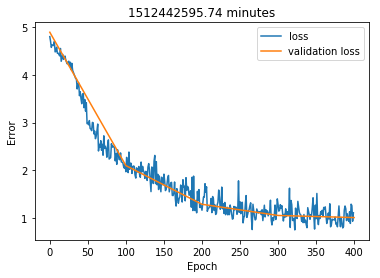

Starting epoch 	401
Starting epoch 	402
Starting epoch 	403
Starting epoch 	404
Starting epoch 	405
Starting epoch 	406
Starting epoch 	407
Starting epoch 	408
Starting epoch 	409
Starting epoch 	410
Starting epoch 	411
Starting epoch 	412
Starting epoch 	413
Starting epoch 	414
Starting epoch 	415
Starting epoch 	416
Starting epoch 	417
Starting epoch 	418
Starting epoch 	419
Starting epoch 	420
Starting epoch 	421
Starting epoch 	422
Starting epoch 	423
Starting epoch 	424
Starting epoch 	425
Starting epoch 	426
Starting epoch 	427
Starting epoch 	428
Starting epoch 	429
Starting epoch 	430
Starting epoch 	431
Starting epoch 	432
Starting epoch 	433
Starting epoch 	434
Starting epoch 	435
Starting epoch 	436
Starting epoch 	437
Starting epoch 	438
Starting epoch 	439
Starting epoch 	440
Starting epoch 	441
Starting epoch 	442
Starting epoch 	443
Starting epoch 	444
Starting epoch 	445
Starting epoch 	446
Starting epoch 	447
Starting epoch 	448
Starting epoch 	449
Starting epoch 	450


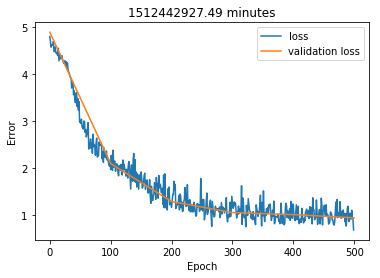

Starting epoch 	501
Starting epoch 	502
Starting epoch 	503
Starting epoch 	504
Starting epoch 	505
Starting epoch 	506
Starting epoch 	507
Starting epoch 	508
Starting epoch 	509
Starting epoch 	510
Starting epoch 	511
Starting epoch 	512
Starting epoch 	513
Starting epoch 	514
Starting epoch 	515
Starting epoch 	516
Starting epoch 	517
Starting epoch 	518
Starting epoch 	519
Starting epoch 	520
Starting epoch 	521
Starting epoch 	522
Starting epoch 	523
Starting epoch 	524
Starting epoch 	525
Starting epoch 	526
Starting epoch 	527
Starting epoch 	528
Starting epoch 	529
Starting epoch 	530
Starting epoch 	531
Starting epoch 	532
Starting epoch 	533
Starting epoch 	534
Starting epoch 	535
Starting epoch 	536
Starting epoch 	537
Starting epoch 	538
Starting epoch 	539
Starting epoch 	540
Starting epoch 	541
Starting epoch 	542
Starting epoch 	543
Starting epoch 	544
Starting epoch 	545
Starting epoch 	546
Starting epoch 	547
Starting epoch 	548
Starting epoch 	549
Starting epoch 	550


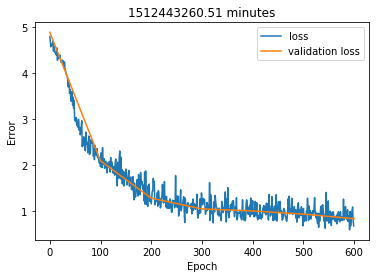

Starting epoch 	601
Starting epoch 	602
Starting epoch 	603
Starting epoch 	604
Starting epoch 	605
Starting epoch 	606
Starting epoch 	607
Starting epoch 	608
Starting epoch 	609
Starting epoch 	610
Starting epoch 	611
Starting epoch 	612
Starting epoch 	613
Starting epoch 	614
Starting epoch 	615
Starting epoch 	616
Starting epoch 	617
Starting epoch 	618
Starting epoch 	619
Starting epoch 	620
Starting epoch 	621
Starting epoch 	622
Starting epoch 	623
Starting epoch 	624
Starting epoch 	625
Starting epoch 	626
Starting epoch 	627
Starting epoch 	628
Starting epoch 	629
Starting epoch 	630
Starting epoch 	631
Starting epoch 	632
Starting epoch 	633
Starting epoch 	634
Starting epoch 	635
Starting epoch 	636
Starting epoch 	637
Starting epoch 	638
Starting epoch 	639
Starting epoch 	640
Starting epoch 	641
Starting epoch 	642
Starting epoch 	643
Starting epoch 	644
Starting epoch 	645
Starting epoch 	646
Starting epoch 	647
Starting epoch 	648
Starting epoch 	649
Starting epoch 	650


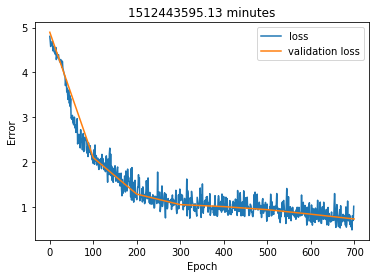

Starting epoch 	701
Starting epoch 	702
Starting epoch 	703
Starting epoch 	704
Starting epoch 	705
Starting epoch 	706
Starting epoch 	707
Starting epoch 	708
Starting epoch 	709
Starting epoch 	710
Starting epoch 	711
Starting epoch 	712
Starting epoch 	713
Starting epoch 	714
Starting epoch 	715
Starting epoch 	716
Starting epoch 	717
Starting epoch 	718
Starting epoch 	719
Starting epoch 	720
Starting epoch 	721
Starting epoch 	722
Starting epoch 	723
Starting epoch 	724
Starting epoch 	725
Starting epoch 	726
Starting epoch 	727
Starting epoch 	728
Starting epoch 	729
Starting epoch 	730
Starting epoch 	731
Starting epoch 	732
Starting epoch 	733
Starting epoch 	734
Starting epoch 	735
Starting epoch 	736
Starting epoch 	737
Starting epoch 	738
Starting epoch 	739
Starting epoch 	740
Starting epoch 	741
Starting epoch 	742
Starting epoch 	743
Starting epoch 	744
Starting epoch 	745
Starting epoch 	746
Starting epoch 	747
Starting epoch 	748
Starting epoch 	749
Starting epoch 	750


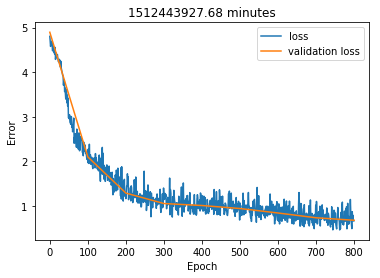

Starting epoch 	801
Starting epoch 	802
Starting epoch 	803
Starting epoch 	804
Starting epoch 	805
Starting epoch 	806
Starting epoch 	807
Starting epoch 	808
Starting epoch 	809
Starting epoch 	810
Starting epoch 	811
Starting epoch 	812
Starting epoch 	813
Starting epoch 	814
Starting epoch 	815
Starting epoch 	816
Starting epoch 	817
Starting epoch 	818
Starting epoch 	819
Starting epoch 	820
Starting epoch 	821
Starting epoch 	822
Starting epoch 	823
Starting epoch 	824
Starting epoch 	825
Starting epoch 	826
Starting epoch 	827
Starting epoch 	828
Starting epoch 	829
Starting epoch 	830
Starting epoch 	831
Starting epoch 	832
Starting epoch 	833
Starting epoch 	834
Starting epoch 	835
Starting epoch 	836
Starting epoch 	837
Starting epoch 	838
Starting epoch 	839
Starting epoch 	840
Starting epoch 	841
Starting epoch 	842
Starting epoch 	843
Starting epoch 	844
Starting epoch 	845
Starting epoch 	846
Starting epoch 	847
Starting epoch 	848
Starting epoch 	849
Starting epoch 	850


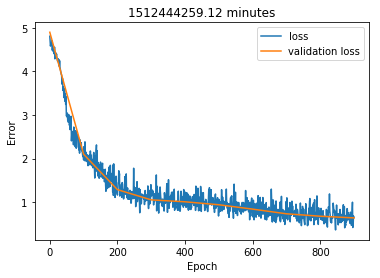

Starting epoch 	901
Starting epoch 	902
Starting epoch 	903
Starting epoch 	904
Starting epoch 	905
Starting epoch 	906
Starting epoch 	907
Starting epoch 	908
Starting epoch 	909
Starting epoch 	910
Starting epoch 	911
Starting epoch 	912
Starting epoch 	913
Starting epoch 	914
Starting epoch 	915
Starting epoch 	916
Starting epoch 	917
Starting epoch 	918
Starting epoch 	919
Starting epoch 	920
Starting epoch 	921
Starting epoch 	922
Starting epoch 	923
Starting epoch 	924
Starting epoch 	925
Starting epoch 	926
Starting epoch 	927
Starting epoch 	928
Starting epoch 	929
Starting epoch 	930
Starting epoch 	931
Starting epoch 	932
Starting epoch 	933
Starting epoch 	934
Starting epoch 	935
Starting epoch 	936
Starting epoch 	937
Starting epoch 	938
Starting epoch 	939
Starting epoch 	940
Starting epoch 	941
Starting epoch 	942
Starting epoch 	943
Starting epoch 	944
Starting epoch 	945
Starting epoch 	946
Starting epoch 	947
Starting epoch 	948
Starting epoch 	949
Starting epoch 	950


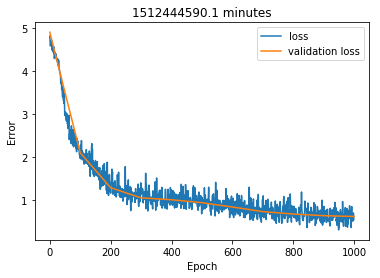

Starting epoch 	1001
Starting epoch 	1002
Starting epoch 	1003
Starting epoch 	1004
Starting epoch 	1005
Starting epoch 	1006
Starting epoch 	1007
Starting epoch 	1008
Starting epoch 	1009
Starting epoch 	1010
Starting epoch 	1011
Starting epoch 	1012
Starting epoch 	1013
Starting epoch 	1014
Starting epoch 	1015
Starting epoch 	1016
Starting epoch 	1017
Starting epoch 	1018
Starting epoch 	1019
Starting epoch 	1020
Starting epoch 	1021
Starting epoch 	1022
Starting epoch 	1023
Starting epoch 	1024
Starting epoch 	1025
Starting epoch 	1026
Starting epoch 	1027
Starting epoch 	1028
Starting epoch 	1029
Starting epoch 	1030
Starting epoch 	1031
Starting epoch 	1032
Starting epoch 	1033
Starting epoch 	1034
Starting epoch 	1035
Starting epoch 	1036
Starting epoch 	1037
Starting epoch 	1038
Starting epoch 	1039
Starting epoch 	1040
Starting epoch 	1041
Starting epoch 	1042
Starting epoch 	1043
Starting epoch 	1044
Starting epoch 	1045
Starting epoch 	1046
Starting epoch 	1047
Starting epoc

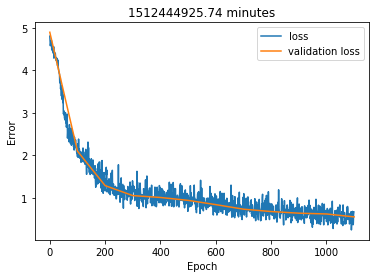

Starting epoch 	1101
Starting epoch 	1102
Starting epoch 	1103
Starting epoch 	1104
Starting epoch 	1105
Starting epoch 	1106
Starting epoch 	1107
Starting epoch 	1108
Starting epoch 	1109
Starting epoch 	1110
Starting epoch 	1111
Starting epoch 	1112
Starting epoch 	1113
Starting epoch 	1114
Starting epoch 	1115
Starting epoch 	1116
Starting epoch 	1117
Starting epoch 	1118
Starting epoch 	1119
Starting epoch 	1120
Starting epoch 	1121
Starting epoch 	1122
Starting epoch 	1123
Starting epoch 	1124
Starting epoch 	1125
Starting epoch 	1126
Starting epoch 	1127
Starting epoch 	1128
Starting epoch 	1129
Starting epoch 	1130
Starting epoch 	1131
Starting epoch 	1132
Starting epoch 	1133
Starting epoch 	1134
Starting epoch 	1135
Starting epoch 	1136
Starting epoch 	1137
Starting epoch 	1138
Starting epoch 	1139
Starting epoch 	1140
Starting epoch 	1141
Starting epoch 	1142
Starting epoch 	1143
Starting epoch 	1144
Starting epoch 	1145
Starting epoch 	1146
Starting epoch 	1147
Starting epoc

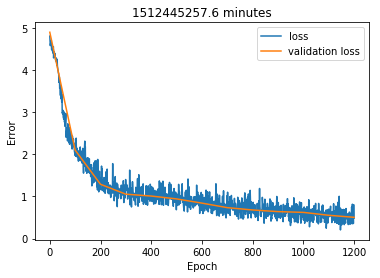

Starting epoch 	1201
Starting epoch 	1202
Starting epoch 	1203
Starting epoch 	1204
Starting epoch 	1205
Starting epoch 	1206
Starting epoch 	1207
Starting epoch 	1208
Starting epoch 	1209
Starting epoch 	1210
Starting epoch 	1211
Starting epoch 	1212
Starting epoch 	1213
Starting epoch 	1214
Starting epoch 	1215
Starting epoch 	1216
Starting epoch 	1217
Starting epoch 	1218
Starting epoch 	1219
Starting epoch 	1220
Starting epoch 	1221
Starting epoch 	1222
Starting epoch 	1223
Starting epoch 	1224
Starting epoch 	1225
Starting epoch 	1226
Starting epoch 	1227
Starting epoch 	1228
Starting epoch 	1229
Starting epoch 	1230
Starting epoch 	1231
Starting epoch 	1232
Starting epoch 	1233
Starting epoch 	1234
Starting epoch 	1235
Starting epoch 	1236
Starting epoch 	1237
Starting epoch 	1238
Starting epoch 	1239
Starting epoch 	1240
Starting epoch 	1241
Starting epoch 	1242
Starting epoch 	1243
Starting epoch 	1244
Starting epoch 	1245
Starting epoch 	1246
Starting epoch 	1247
Starting epoc

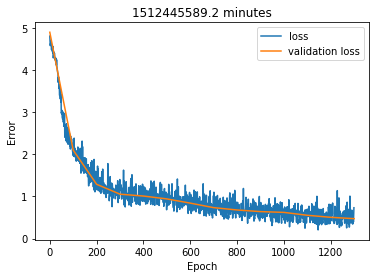

Starting epoch 	1301
Starting epoch 	1302
Starting epoch 	1303
Starting epoch 	1304
Starting epoch 	1305
Starting epoch 	1306
Starting epoch 	1307
Starting epoch 	1308
Starting epoch 	1309
Starting epoch 	1310
Starting epoch 	1311
Starting epoch 	1312
Starting epoch 	1313
Starting epoch 	1314
Starting epoch 	1315
Starting epoch 	1316
Starting epoch 	1317
Starting epoch 	1318
Starting epoch 	1319
Starting epoch 	1320
Starting epoch 	1321
Starting epoch 	1322
Starting epoch 	1323
Starting epoch 	1324
Starting epoch 	1325
Starting epoch 	1326
Starting epoch 	1327
Starting epoch 	1328
Starting epoch 	1329
Starting epoch 	1330
Starting epoch 	1331
Starting epoch 	1332
Starting epoch 	1333
Starting epoch 	1334
Starting epoch 	1335
Starting epoch 	1336
Starting epoch 	1337
Starting epoch 	1338
Starting epoch 	1339
Starting epoch 	1340
Starting epoch 	1341
Starting epoch 	1342
Starting epoch 	1343
Starting epoch 	1344
Starting epoch 	1345
Starting epoch 	1346
Starting epoch 	1347
Starting epoc

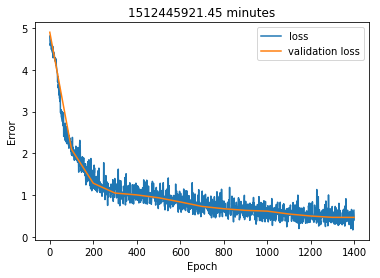

Starting epoch 	1401
Starting epoch 	1402
Starting epoch 	1403
Starting epoch 	1404
Starting epoch 	1405
Starting epoch 	1406
Starting epoch 	1407
Starting epoch 	1408
Starting epoch 	1409
Starting epoch 	1410
Starting epoch 	1411
Starting epoch 	1412
Starting epoch 	1413
Starting epoch 	1414
Starting epoch 	1415
Starting epoch 	1416
Starting epoch 	1417
Starting epoch 	1418
Starting epoch 	1419
Starting epoch 	1420
Starting epoch 	1421
Starting epoch 	1422
Starting epoch 	1423
Starting epoch 	1424
Starting epoch 	1425
Starting epoch 	1426
Starting epoch 	1427
Starting epoch 	1428
Starting epoch 	1429
Starting epoch 	1430
Starting epoch 	1431
Starting epoch 	1432
Starting epoch 	1433
Starting epoch 	1434
Starting epoch 	1435
Starting epoch 	1436
Starting epoch 	1437
Starting epoch 	1438
Starting epoch 	1439
Starting epoch 	1440
Starting epoch 	1441
Starting epoch 	1442
Starting epoch 	1443
Starting epoch 	1444
Starting epoch 	1445
Starting epoch 	1446
Starting epoch 	1447
Starting epoc

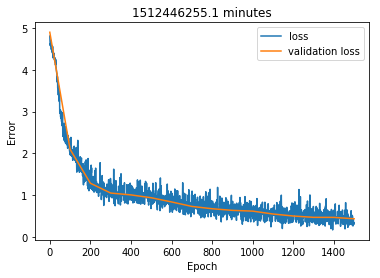

Starting epoch 	1501
Starting epoch 	1502
Starting epoch 	1503
Starting epoch 	1504
Starting epoch 	1505
Starting epoch 	1506
Starting epoch 	1507
Starting epoch 	1508
Starting epoch 	1509
Starting epoch 	1510
Starting epoch 	1511
Starting epoch 	1512
Starting epoch 	1513
Starting epoch 	1514
Starting epoch 	1515
Starting epoch 	1516
Starting epoch 	1517
Starting epoch 	1518
Starting epoch 	1519
Starting epoch 	1520
Starting epoch 	1521
Starting epoch 	1522
Starting epoch 	1523
Starting epoch 	1524
Starting epoch 	1525
Starting epoch 	1526
Starting epoch 	1527
Starting epoch 	1528
Starting epoch 	1529
Starting epoch 	1530
Starting epoch 	1531
Starting epoch 	1532
Starting epoch 	1533
Starting epoch 	1534
Starting epoch 	1535
Starting epoch 	1536
Starting epoch 	1537
Starting epoch 	1538
Starting epoch 	1539
Starting epoch 	1540
Starting epoch 	1541
Starting epoch 	1542
Starting epoch 	1543
Starting epoch 	1544
Starting epoch 	1545
Starting epoch 	1546
Starting epoch 	1547
Starting epoc

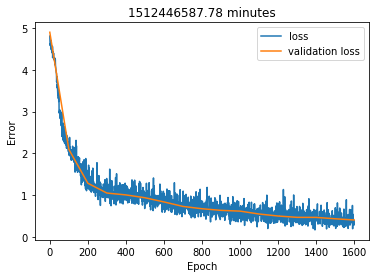

Starting epoch 	1601
Starting epoch 	1602
Starting epoch 	1603
Starting epoch 	1604
Starting epoch 	1605
Starting epoch 	1606
Starting epoch 	1607
Starting epoch 	1608
Starting epoch 	1609
Starting epoch 	1610
Starting epoch 	1611
Starting epoch 	1612
Starting epoch 	1613
Starting epoch 	1614
Starting epoch 	1615
Starting epoch 	1616
Starting epoch 	1617
Starting epoch 	1618
Starting epoch 	1619
Starting epoch 	1620
Starting epoch 	1621
Starting epoch 	1622
Starting epoch 	1623
Starting epoch 	1624
Starting epoch 	1625
Starting epoch 	1626
Starting epoch 	1627
Starting epoch 	1628
Starting epoch 	1629
Starting epoch 	1630
Starting epoch 	1631
Starting epoch 	1632
Starting epoch 	1633
Starting epoch 	1634
Starting epoch 	1635
Starting epoch 	1636
Starting epoch 	1637
Starting epoch 	1638
Starting epoch 	1639
Starting epoch 	1640
Starting epoch 	1641
Starting epoch 	1642
Starting epoch 	1643
Starting epoch 	1644
Starting epoch 	1645
Starting epoch 	1646
Starting epoch 	1647
Starting epoc

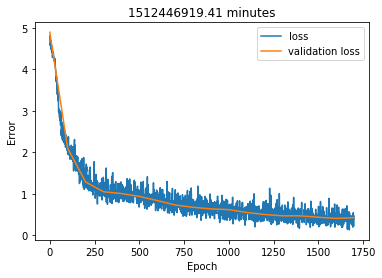

Starting epoch 	1701
Starting epoch 	1702
Starting epoch 	1703
Starting epoch 	1704
Starting epoch 	1705
Starting epoch 	1706
Starting epoch 	1707
Starting epoch 	1708
Starting epoch 	1709
Starting epoch 	1710
Starting epoch 	1711
Starting epoch 	1712
Starting epoch 	1713
Starting epoch 	1714
Starting epoch 	1715
Starting epoch 	1716
Starting epoch 	1717
Starting epoch 	1718
Starting epoch 	1719
Starting epoch 	1720
Starting epoch 	1721
Starting epoch 	1722
Starting epoch 	1723
Starting epoch 	1724
Starting epoch 	1725
Starting epoch 	1726
Starting epoch 	1727
Starting epoch 	1728
Starting epoch 	1729
Starting epoch 	1730
Starting epoch 	1731
Starting epoch 	1732
Starting epoch 	1733
Starting epoch 	1734
Starting epoch 	1735
Starting epoch 	1736
Starting epoch 	1737
Starting epoch 	1738
Starting epoch 	1739
Starting epoch 	1740
Starting epoch 	1741
Starting epoch 	1742
Starting epoch 	1743
Starting epoch 	1744
Starting epoch 	1745
Starting epoch 	1746
Starting epoch 	1747
Starting epoc

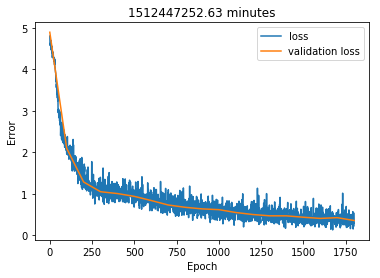

Starting epoch 	1801
Starting epoch 	1802
Starting epoch 	1803
Starting epoch 	1804
Starting epoch 	1805
Starting epoch 	1806
Starting epoch 	1807
Starting epoch 	1808
Starting epoch 	1809
Starting epoch 	1810
Starting epoch 	1811
Starting epoch 	1812
Starting epoch 	1813
Starting epoch 	1814
Starting epoch 	1815
Starting epoch 	1816
Starting epoch 	1817
Starting epoch 	1818
Starting epoch 	1819
Starting epoch 	1820
Starting epoch 	1821
Starting epoch 	1822
Starting epoch 	1823
Starting epoch 	1824
Starting epoch 	1825
Starting epoch 	1826
Starting epoch 	1827
Starting epoch 	1828
Starting epoch 	1829
Starting epoch 	1830
Starting epoch 	1831
Starting epoch 	1832
Starting epoch 	1833
Starting epoch 	1834
Starting epoch 	1835
Starting epoch 	1836
Starting epoch 	1837
Starting epoch 	1838
Starting epoch 	1839
Starting epoch 	1840
Starting epoch 	1841
Starting epoch 	1842
Starting epoch 	1843
Starting epoch 	1844
Starting epoch 	1845
Starting epoch 	1846
Starting epoch 	1847
Starting epoc

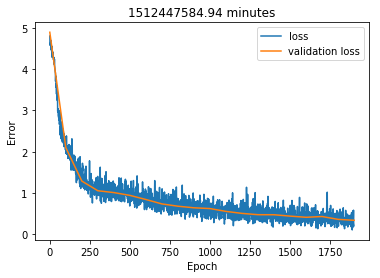

Starting epoch 	1901
Starting epoch 	1902
Starting epoch 	1903
Starting epoch 	1904
Starting epoch 	1905
Starting epoch 	1906
Starting epoch 	1907
Starting epoch 	1908
Starting epoch 	1909
Starting epoch 	1910
Starting epoch 	1911
Starting epoch 	1912
Starting epoch 	1913
Starting epoch 	1914
Starting epoch 	1915
Starting epoch 	1916
Starting epoch 	1917
Starting epoch 	1918
Starting epoch 	1919
Starting epoch 	1920
Starting epoch 	1921
Starting epoch 	1922
Starting epoch 	1923
Starting epoch 	1924
Starting epoch 	1925
Starting epoch 	1926
Starting epoch 	1927
Starting epoch 	1928
Starting epoch 	1929
Starting epoch 	1930
Starting epoch 	1931
Starting epoch 	1932
Starting epoch 	1933
Starting epoch 	1934
Starting epoch 	1935
Starting epoch 	1936
Starting epoch 	1937
Starting epoch 	1938
Starting epoch 	1939
Starting epoch 	1940
Starting epoch 	1941
Starting epoch 	1942
Starting epoch 	1943
Starting epoch 	1944
Starting epoch 	1945
Starting epoch 	1946
Starting epoch 	1947
Starting epoc

(array([4.80422211, 4.70604229, 4.57833576, ..., 0.47411627, 0.48551849,
        0.29318443]),
 array([4.89600086, 2.09822392, 1.28735113, 1.05277908, 1.00862825,
        0.94064718, 0.84058148, 0.73330498, 0.67784452, 0.63931078,
        0.62096375, 0.55202842, 0.50391734, 0.4721674 , 0.47126135,
        0.4379563 , 0.40930888, 0.42777112, 0.35901839, 0.33657986]))

In [8]:
# training parameters

training_params = {
    'epochs': 2000, 
    'val_step': 100, # at what intervals to do validation, divisible by NEPOCH
    'stoch_samples': 50, # how many stochastic dropout samples to use for a mean output reading 
    'minibatch': 25, # size of minibatches
    'train_x': dataX,
    'train_y': dataY,
    'val_x': dataX_val,
    'val_y': dataY_val,
}

forward_model.train_net(training_params)

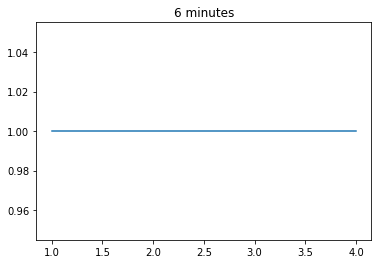

In [9]:
plt.plot([1,3,4],[1,1,1], label= 'blue')
plt.title(str(6) + ' minutes')

In [10]:
sess.run(tf.global_variables_initializer())

loss = np.zeros(NEPOCH)
val_loss = np.zeros(NEPOCH/val_step)

with tf.device('/cpu:0'):
    train_step = forward_model._net_ops['train']
    loss_op  = forward_model._net_ops['loss']
    bs = forward_model._params['batch_size']
    val_counter = 0
    counter = 0
    
    for i in range(NEPOCH): 
        if (i%25==0):
            print i
        b_start_counter = 0
        b_end_counter = bs
        
        feed_dict = {forward_model._net_ops['x']: dataX[b_start_counter:b_end_counter], forward_model._net_ops['y']: dataY[b_start_counter:b_end_counter]}
        feed_dict_val = {forward_model._net_ops['x']: dataX_val[0:bs], forward_model._net_ops['y']: dataY_val[0:bs]}
        
        for j in range(int(len(dataX))/bs):
            _, loss[i] = forward_model._sess.run([train_step, loss_op], feed_dict=feed_dict)
            
            b_start_counter += bs
            b_end_counter += bs
            #shift batch on
            feed_dict = {forward_model._net_ops['x']: dataX[b_start_counter:b_end_counter], forward_model._net_ops['y']: dataY[b_start_counter:b_end_counter]}
        
        if (i%val_step == 0):
            valSumSum = 0
            for j in range(int(len(dataX_val))):
                valSum = 0
                feed_dict_val = {forward_model._net_ops['x']: [dataX_val[j]], forward_model._net_ops['y']: [dataY_val[j]]}
                for l in range(stoch_samples):
                    valSum += forward_model._sess.run(loss_op, feed_dict=feed_dict_val)
                valSumSum += valSum/stoch_samples
            val_loss[val_counter] = valSumSum/len(dataX_val)
            val_counter += 1
            
        #reshuffle after epoch to avoid same cycle
        np.random.shuffle(train_data)
        dataX = train_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
        dataY = train_data[:, [7,8, 9]] # end parameters
            
        np.random.shuffle(val_data)
        dataX_val = val_data[:, np.r_[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]] # inputs
        dataY_val = val_data[:, [7,8, 9]] # end parameters
        
        if (i%val_step == 0) and (i>1):
            #print loss[i]
            #print val_loss[i]
            plt.plot(range(0,i), loss[0:i], label = "loss")
            plt.plot(range(0,i+1,val_step), val_loss[0:val_counter], label = "validation loss")
            plt.show()
            
        counter +=1
        #print 'epoch: ',i+1, ', loss: ', round(loss[i], 3), ', last calculated val loss: ',round(val_loss[val_counter-1], 3), 'time elapsed: ',round((time.time()-t0)/60), 'minutes' 
        

NameError: name 'NEPOCH' is not defined

In [ ]:
for n in range(4): 
    shape_id = shape_ids[n]
    probe_radius = 0.004745
    
    if (shape_id == 'ellip1' or shape_id == 'ellip2' or shape_id == 'ellip3' or shape_id == 'butter'):
        shape_polygon = shape_db.shape_db[shape_id]['shape'][0]
    else:
        shape_polygon = shape_db.shape_db[shape_id]['shape']
        shape_polygon.append(shape_polygon[0])
     
    # average over multiple stochastic models to get averaged
    feed_dict = {forward_model._net_ops['x']: dataX_vals[n]}
    
    with tf.device('/cpu:0'):
        ccpredictions_mus = []
    
        for i in range(stoch_samples*10):
            mus_op = forward_model._net_ops['mu']
            sigmas_op  = forward_model._net_ops['sigma']
            pis_op = forward_model._net_ops['pi']
    
            out_mus = forward_model._sess.run(mus_op, feed_dict=feed_dict)
            out_sigmas = forward_model._sess.run(sigmas_op, feed_dict=feed_dict)
            out_pis = forward_model._sess.run(pis_op, feed_dict=feed_dict)
    
            concat_out_pis = np.swapaxes(np.array([out_pis, out_pis, out_pis]),0,1) # make shape same as mus
            weighted_mus = out_mus*concat_out_pis
            ccpredictions_mus.append(np.sum(weighted_mus,2).tolist())
    
        sum_avg_err_NN = np.sum(np.mean(np.abs(dataY_vals[n]-np.mean(ccpredictions_mus, axis = 0)), axis = 0))
    
        # de_rescale 
        ccpredictions_mus = (ccpredictions_mus*(Ymaxs-Ymins))+Ymins
        dataX_val = (dataX_vals[n]*(Xmaxs-Xmins))+Xmins  
        dataY_val = (dataY_vals[n]*(Ymaxs-Ymins))+Ymins
        
        ccpredictions_mus_mean = np.mean(ccpredictions_mus, axis = 0)
        ccpredictions_sigmas = np.std(ccpredictions_mus, axis = 0)
        
        #better error measure
        dXYtheta = dataY_val-ccpredictions_mus_mean
        hypoten = []
        for e in range(len(dXYtheta)):
            dist = np.sqrt(np.square(dXYtheta[e][0])+np.square(dXYtheta[e][1]))
            hypoten.append(dist)
        DIST_avg_err_NN = np.mean(hypoten)
        DIST_std_err_NN = np.std(hypoten)
        ROTA_avg_err_NN = np.mean(np.abs(dXYtheta[:,2]))
        ROTA_std_err_NN = np.std(np.abs(dXYtheta[:,2]))
        
    print sum_avg_err_NN, '= sum_avg_err_NN for shape', shape_id
    print DIST_avg_err_NN, '= DIST_avg_err_NN for shape', shape_id
    print DIST_std_err_NN, '= DIST_std_err_NN for shape', shape_id
    print ROTA_avg_err_NN, '= ROTA_avg_err_NN for shape', shape_id
    print ROTA_std_err_NN, '= ROTA_std_err_NN for shape', shape_id
    
    dataX_test = dataX_val
    dataY_test = dataY_val
    counter = 0
    
    if (shape_id!='ellip1' and shape_id!='ellip2' and shape_id!='ellip3'):
        for i in range(len(dataX_test)):
            obj_start = dataX_test[i, [4, 5, 6]]
            transformed_start = rigidtransform(shape_polygon, obj_start)
            plottransformed_obj(transformed_start, 'g', 1.0)
            plottransformed_pusher(dataX_test[i,0], dataX_test[i,1], probe_radius, 'g')

            transformed_end = rigidtransform(shape_polygon, dataY_test[i])
            plottransformed_obj(transformed_end, 'r', 1.0)
            plottransformed_pusher(dataX_test[i,2], dataX_test[i,3], probe_radius, 'r')

            pred = ccpredictions_mus_mean[i] ## uncomment to use convex combination
            pred_sig = ccpredictions_sigmas[i]
            #pred = predictions[i]
    
            xs = np.linspace(pred[0]-pred_sig[0], pred[0]+pred_sig[0], 3)
            ys = np.linspace(pred[1]-pred_sig[1], pred[1]+pred_sig[1], 3)
            thetas = np.linspace(pred[2]-pred_sig[2], pred[2]+pred_sig[2], 3)
    
            for i in xs:
                for j in ys:
                    for l in thetas:
                        transformed_pred = rigidtransform(shape_polygon, [i,j,l])
                        plottransformed_obj(transformed_pred, 'b', 0.2)
                
            transformed_pred = rigidtransform(shape_polygon, pred)
            plottransformed_obj(transformed_pred, 'b', 1)
                
            print 'NN'
            plt.show()            
    else:
        for i in range(len(dataX_test)):
            obj_startX = dataX_test[i, [4]]
            obj_startY = dataX_test[i, [5]]
            obj_startTheta = dataX_test[i, [6]]
            obj_endX = dataY_test[i, [0]]
            obj_endY = dataY_test[i, [1]]
            obj_endTheta = dataY_test[i, [2]]
    
            pred = ccpredictions_mus_mean[i] ## uncomment to use convex combination
            pred_sig = ccpredictions_sigmas[i]
    
            plt.figure(figsize=(4, 4))
    
            plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((obj_startX, obj_startY), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(obj_startTheta), fill=False, color='g'))
            plottransformed_pusher(dataX_test[i,0], dataX_test[i,1], probe_radius, 'g')
            plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((obj_endX, obj_endY), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(obj_endTheta), fill=False, color='r'))
            plottransformed_pusher(dataX_test[i,2], dataX_test[i,3], probe_radius, 'r')
    
            xs = np.linspace(pred[0]-pred_sig[0], pred[0]+pred_sig[0], 3)
            ys = np.linspace(pred[1]-pred_sig[1], pred[1]+pred_sig[1], 3)
            thetas = np.linspace(pred[2]-pred_sig[2], pred[2]+pred_sig[2], 3)
    
            for m in xs:
                for j in ys:
                    for l in thetas:
                        plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((m, j), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(l), fill=False, color='b', alpha = 0.1))
                
            print 'NN'
            plt.figure(i).add_subplot(111, aspect='equal').add_artist(Ellipse((pred[0], pred[1]), shape_polygon[0]*2, shape_polygon[1]*2, angle=math.degrees(pred[2]), fill=False, color='b', alpha = 1))
            plt.axis([obj_startX-0.15, obj_startX+0.15, obj_startY-0.15, obj_startY+0.15])
            plt.show()        
        print counter
        counter +=1
    t1 = time.time()

    total = t1-t0
    print total/60 #time in minutes

In [ ]:
y_mean = np.mean(dataY_test, axis=0)
end_obs = dataY_test
end_pred = ccpredictions_mus_mean

pred_diff_squared = np.square(end_obs-end_pred)
obs_diff_squared = np.square(end_obs-y_mean)

n_summed_obs = np.sum(obs_diff_squared, axis=0)
n_summed_pred = np.sum(pred_diff_squared, axis=0)

nmse = n_summed_pred/n_summed_obs
print nmse
print np.sum(nmse)

In [ ]:
y_mean = np.mean(dataY_test, axis=0)

In [ ]:
width = 0.35

self_dists_samples =  [[0.0051222339288334263, 0.0044158771643205835, 0.0055815628117350888],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0062445242198103552, 0.0077418373545106618, 0.0061277925049182556]]
self_rots_samples =  [[0.11908324792858131, 0.11306688419043792, 0.13449593724190473],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.16339293662301596, 0.20019611339372209, 0.1321339022201474]]
self_dists_std = (np.std(self_dists_samples, axis=1)*1000)/np.sqrt(40)
self_rots_std = np.std(self_rots_samples, axis=1)/np.sqrt(40)
self_dists = (np.mean(self_dists_samples, axis=1)*1000)
self_rots = np.mean(self_rots_samples, axis=1)

dists = np.array([0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176])*1000
rots = np.array([0.114779675876,0.1966752851,0.12398435151,0.162222983751])
dists_std = (np.array([0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219])*1000)/np.sqrt(400)
rots_std = (np.array([0.181019167684,0.358298909743,0.231339061904,0.228280870148]))/np.sqrt(400)
ind = np.arange(len(dists))
# distances x 1000 to scale it from m to mm
#fig, ax3 = plt.subplots(figsize=(10, 5))

fig, ax1 = plt.subplots(figsize=(10, 5))
fig, dudax = plt.subplots()
width = 0.2
bar1 = ax1.bar(ind-width-width, dists, width, color='b', yerr=dists_std, capsize=3, hatch="*")
bar2 = ax1.bar(ind-width, self_dists, width, color='b', yerr=self_dists_std, capsize=3)

ax1.set_xlabel('Shape')
ax1.set_title('')
ax1.set_xticks(ind + width/2 + width)
ax1.set_xticklabels(('rect1', 'ellip1', 'tri1', 'butter'))
ax1.set_ylabel('Avg Translation Error (mm)', color='b')
ax1.tick_params('y', colors='b')

dudbar1 = dudax.bar(ind, dists, width, color="1", hatch="*", edgecolor = "0")
dudbar2 = dudax.bar(ind, dists, width, color="1", edgecolor = "0")
ax1.legend((dudbar1[0], dudbar2[0]), ('Shape-generalized', 'Self-generalized'))

ax2 = ax1.twinx()
bar3 = ax2.bar(ind, rots, width, yerr=rots_std, capsize=3, color = 'r', hatch="*")
bar4 = ax2.bar(ind+width, self_rots, width, yerr=self_rots_std, capsize=3, color = 'r')
ax2.set_xticks(ind + width/2 - width)
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax2.set_ylabel(rotationname, color='r')
ax2.tick_params('y', colors='r')
#ax2.set_ylim([0, 0.6])

fig.tight_layout()
plt.show()





































ax3.bar(ind-width, dists, width, yerr=dists_std, capsize=3, color='b')
ax3.set_xlabel('Shape')
# Make the y-axis label, ticks and tick labels match the line color.
ax3.set_ylabel('Avg Translation Error (mm)', color='b')
ax3.tick_params('y', colors='b')
ax3.set_xticks(ind-width/2)
ax3.set_xticklabels(('rect1', 'ellip1', 'tri1', 'butter'))

ax4 = ax3.twinx()
ax4.bar(ind, rots, width, yerr=rots_std, capsize=3, color = 'r')
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax4.set_ylabel(rotationname, color='r')
ax4.tick_params('y', colors='r')
ax4.set_ylim([0, 0.6])

fig.tight_layout()
plt.show()

In [ ]:
shape_pred_dist_err_NN =  [[0.0051222339288334263, 0.0044158771643205835, 0.0055815628117350888],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0055966727612206321, 0.0052129928893983784, 0.0053804816110431036],[0.0062445242198103552, 0.0077418373545106618, 0.0061277925049182556]]
shape_pred_rota_err_NN =  [[0.11908324792858131, 0.11306688419043792, 0.13449593724190473],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.13315670483678643, 0.15913810546391505, 0.16429507204279439],[0.16339293662301596, 0.20019611339372209, 0.1321339022201474]]
shape_pred_dist_err_KDE_silvermann =  [[0.0076849848465869028, 0.0061239361354140827, 0.0066136406935347405],[0.007095955688400513, 0.0067535231127581379, 0.0070346329249749533],[0.007095955688400513, 0.0067535231127581379, 0.0070346329249749533],[0.0067218774124073203, 0.0071787339605984693, 0.0068800714419015047]]
shape_pred_rota_err_KDE_silvermann =  [[0.1628712066097272, 0.18399190153472958, 0.14635497744347506],[0.17927241083699877, 0.14591283781941025, 0.1874788206645388],[0.17927241083699877, 0.14591283781941025, 0.1874788206645388],[0.18773167922290554, 0.19606564396288928, 0.16156655221565774]]

butter
shape_pred_dist_err_NN =  []
shape_pred_rota_err_NN =  []
shape_pred_dist_err_KDE_silvermann =  [[
shape_pred_rota_err_KDE_silvermann =  []


In [ ]:
width = 0.35
dists = np.array([0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176])*1000
rots = np.array([0.114779675876,0.1966752851,0.12398435151,0.162222983751])
dists_std = (np.array([0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219])*1000)/np.sqrt(400)
rots_std = (np.array([0.181019167684,0.358298909743,0.231339061904,0.228280870148]))/np.sqrt(400)
ind = np.arange(len(dists))
# distances x 1000 to scale it from m to mm
#fig, ax3 = plt.subplots(figsize=(10, 5))
fig, ax3 = plt.subplots()

ax3.bar(ind-width, dists, width, yerr=dists_std, capsize=3, color='b')
ax3.set_xlabel('Shape')
# Make the y-axis label, ticks and tick labels match the line color.
ax3.set_ylabel('Avg Translation Error (mm)', color='b')
ax3.tick_params('y', colors='b')
ax3.set_xticks(ind-width/2)
ax3.set_xticklabels(('rect1', 'ellip1', 'tri1', 'butter'))

ax4 = ax3.twinx()
ax4.bar(ind, rots, width, yerr=rots_std, capsize=3, color = 'r')
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax4.set_ylabel(rotationname, color='r')
ax4.tick_params('y', colors='r')
ax4.set_ylim([0, 0.6])

fig.tight_layout()
plt.show()

In [ ]:
# dist and rotation errors from shape gen results of rect1, ellip1, tri1, butter with mods 1,5,10,20,50,100,200,400
dists_avg = np.transpose([[0.004174072201,0.00539508588936,0.00406902624002,0.00561273291433],[0.00424745812569,0.0059672177021,0.0044816880945,0.00582550026999],[0.00371908713442,0.00511543824635,0.00371321917808,0.00491286851325],[0.00402253928778,0.00510835481356,0.00405491690961,0.00511058820482],[0.00364162855923,0.00483592603532,0.00363702164553,0.00523133984924],[0.00383869051779,0.00477036059801,0.004284059003,0.00489811435511],[0.00407818530496,0.00577834449012,0.00414091982503,0.00508186111089],[0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176]])*1000
dists_std = np.transpose([[0.00259115737967,0.00416847071369,0.0025910897571,0.004019517648],[0.00248442641551,0.00355023655479,0.00280208671003,0.00607067084104],[0.00222420980624,0.00332107492258,0.00250263294026,0.00306031644755],[0.00321723098336,0.00377211435231,0.00248781832546,0.00373984746373],[0.00212480873796,0.00346466418531,0.00207069510347,0.00550469333458],[0.00230905423479,0.00300393992134,0.00242575958624,0.00327214707882],[0.00249478325989,0.00338054593903,0.00260663151293,0.00348589586966],[0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219]])*1000/np.sqrt(350)
rot_avg = np.transpose([[0.252274843628,0.366062875924,0.264648902447,0.390669092195],[0.121372220378,0.195967766555,0.133392494195,0.167594886496],[0.107112309389,0.192605699812,0.123241465214,0.147309826954],[0.125262553663,0.208092778887,0.148133068346,0.182191689339],[0.114813439128,0.195663087689,0.117820021479,0.150275371795],[0.109302035738,0.180553580156,0.106860850896,0.139552317543],[0.123026070942,0.202021760767,0.124767310681,0.164774265556],[0.114779675876,0.1966752851,0.12398435151,0.162222983751]])
rot_std = np.transpose([[0.90067701073,1.13597599466,0.969728610913,1.18679226056],[0.176088307103,0.368047900846,0.265838159459,0.268763659631],[0.156569416959,0.383231924843,0.232517310955,0.22299063132],[0.186312993554,0.357767015242,0.227646049125,0.241558193308],[0.202555995106,0.448384368264,0.249450561399,0.262237078417],[0.160691750962,0.33472618728,0.186005455388,0.191406685614],[0.239778402977,0.432832441615,0.227494917001,0.305563147895],[0.181019167684,0.358298909743,0.231339061904,0.228280870148]])/np.sqrt(350)


In [ ]:
# dist and rotation errors from shape gen results of rect1, ellip1, tri1, butter with mods 1,5,10,20,50,100,200,400
dists_avg = np.transpose([[0.004174072201,0.00539508588936,0.00406902624002,0.00561273291433],[0.00424745812569,0.0059672177021,0.0044816880945,0.00582550026999],[0.00371908713442,0.00511543824635,0.00371321917808,0.00491286851325],[0.00402253928778,0.00510835481356,0.00405491690961,0.00511058820482],[0.00364162855923,0.00483592603532,0.00363702164553,0.00523133984924],[0.00383869051779,0.00477036059801,0.004284059003,0.00489811435511],[0.00407818530496,0.00577834449012,0.00414091982503,0.00508186111089],[0.00376513128265,0.00569862031285,0.00400732900878,0.00513413780176]])*1000
dists_std = np.transpose([[0.00259115737967,0.00416847071369,0.0025910897571,0.004019517648],[0.00248442641551,0.00355023655479,0.00280208671003,0.00607067084104],[0.00222420980624,0.00332107492258,0.00250263294026,0.00306031644755],[0.00321723098336,0.00377211435231,0.00248781832546,0.00373984746373],[0.00212480873796,0.00346466418531,0.00207069510347,0.00550469333458],[0.00230905423479,0.00300393992134,0.00242575958624,0.00327214707882],[0.00249478325989,0.00338054593903,0.00260663151293,0.00348589586966],[0.00215905836733,0.00363459768816,0.00224951820607,0.00336522636219]])*1000/np.sqrt(350)
rot_avg = np.transpose([[0.252274843628,0.366062875924,0.264648902447,0.390669092195],[0.121372220378,0.195967766555,0.133392494195,0.167594886496],[0.107112309389,0.192605699812,0.123241465214,0.147309826954],[0.125262553663,0.208092778887,0.148133068346,0.182191689339],[0.114813439128,0.195663087689,0.117820021479,0.150275371795],[0.109302035738,0.180553580156,0.106860850896,0.139552317543],[0.123026070942,0.202021760767,0.124767310681,0.164774265556],[0.114779675876,0.1966752851,0.12398435151,0.162222983751]])
rot_std = np.transpose([[0.90067701073,1.13597599466,0.969728610913,1.18679226056],[0.176088307103,0.368047900846,0.265838159459,0.268763659631],[0.156569416959,0.383231924843,0.232517310955,0.22299063132],[0.186312993554,0.357767015242,0.227646049125,0.241558193308],[0.202555995106,0.448384368264,0.249450561399,0.262237078417],[0.160691750962,0.33472618728,0.186005455388,0.191406685614],[0.239778402977,0.432832441615,0.227494917001,0.305563147895],[0.181019167684,0.358298909743,0.231339061904,0.228280870148]])/np.sqrt(350)

m = [1,5,10,20,50,100,200,400]

plt.figure()
plt.errorbar(m, dists_avg[0], yerr=dists_std[0], marker='s', color='b')
plt.errorbar(m, dists_avg[1], yerr=dists_std[1], marker='o', color='r')
plt.errorbar(m, dists_avg[2], yerr=dists_std[2], marker='^', color='g')
plt.errorbar(m, dists_avg[3], yerr=dists_std[3], marker='x', color='c')
plt.show()

plt.figure()
plt.errorbar(m, rot_avg[0], yerr=rot_std[0], marker='s', color='b')
plt.errorbar(m, rot_avg[1], yerr=rot_std[1], marker='o', color='r')
plt.errorbar(m, rot_avg[2], yerr=rot_std[2], marker='^', color='g')
plt.errorbar(m, rot_avg[3], yerr=rot_std[3], marker='x', color='c')
plt.show()

In [ ]:
# dist and rotation errors from shape gen results of rect1, ellip1, tri1, butter with mods 1,5,10,20,50,100,200,400
dists_avg = np.transpose([[0.004174072201,0.00539508588936,0.00406902624002,0.00561273291433],[0.00424745812569,0.0059672177021,0.0044816880945,0.00582550026999],[0.00371908713442,0.00511543824635,0.00371321917808,0.00491286851325],[0.00402253928778,0.00510835481356,0.00405491690961,0.00511058820482],[0.00364162855923,0.00483592603532,0.00363702164553,0.00523133984924],[0.00383869051779,0.00477036059801,0.004284059003,0.00489811435511]])*1000
dists_std = np.transpose([[0.00259115737967,0.00416847071369,0.0025910897571,0.004019517648],[0.00248442641551,0.00355023655479,0.00280208671003,0.00607067084104],[0.00222420980624,0.00332107492258,0.00250263294026,0.00306031644755],[0.00321723098336,0.00377211435231,0.00248781832546,0.00373984746373],[0.00212480873796,0.00346466418531,0.00207069510347,0.00550469333458],[0.00230905423479,0.00300393992134,0.00242575958624,0.00327214707882]])*1000/np.sqrt(350)
rot_avg = np.transpose([[0.252274843628,0.366062875924,0.264648902447,0.390669092195],[0.121372220378,0.195967766555,0.133392494195,0.167594886496],[0.107112309389,0.192605699812,0.123241465214,0.147309826954],[0.125262553663,0.208092778887,0.148133068346,0.182191689339],[0.114813439128,0.195663087689,0.117820021479,0.150275371795],[0.109302035738,0.180553580156,0.106860850896,0.139552317543]])
rot_std = np.transpose([[0.90067701073,1.13597599466,0.969728610913,1.18679226056],[0.176088307103,0.368047900846,0.265838159459,0.268763659631],[0.156569416959,0.383231924843,0.232517310955,0.22299063132],[0.186312993554,0.357767015242,0.227646049125,0.241558193308],[0.202555995106,0.448384368264,0.249450561399,0.262237078417],[0.160691750962,0.33472618728,0.186005455388,0.191406685614]])/np.sqrt(350)

m = [1,5,10,20,50,100]
fig, ax = plt.subplots(figsize=(3, 3.5))
rect1 = ax.errorbar(m, dists_avg[0], yerr=dists_std[0], marker='s', color='b', capsize=3)
ellip1 = ax.errorbar(m, dists_avg[1], yerr=dists_std[1], marker='o', color='r', capsize=3)
tri1 = ax.errorbar(m, dists_avg[2], yerr=dists_std[2], marker='^', color='g', capsize=3)
butter = ax.errorbar(m, dists_avg[3], yerr=dists_std[3], marker='x', color='c', capsize=3)
ax.set_ylabel('Avg Translation Error (mm)')
ax.set_xlabel('Number of Kernels')
#ax.legend((rect1[0], ellip1[0], tri1[0], butter[0]), ('rect1', 'ellip1', 'tri1', 'butter'))
plt.show()

fig, ax2 = plt.subplots(figsize=(3, 3.5))
rect1 = ax2.errorbar(m, rot_avg[0], yerr=rot_std[0], marker='s', color='b', capsize=3)
ellip1 = ax2.errorbar(m, rot_avg[1], yerr=rot_std[1], marker='o', color='r', capsize=3)
tri1 = ax2.errorbar(m, rot_avg[2], yerr=rot_std[2], marker='^', color='g', capsize=3)
butter = ax2.errorbar(m, rot_avg[3], yerr=rot_std[3], marker='x', color='c', capsize=3)
rotationname = 'Avg Rotation Error (' + r'$\theta$)'
ax2.set_xlabel('Number of Kernels')
ax2.set_ylabel(rotationname)
ax2.legend((rect1[0], ellip1[0], tri1[0], butter[0]), ('rect1', 'ellip1', 'tri1', 'butter'))
plt.show()